In [2]:
import numpy as np
import matplotlib.pyplot as plt

x = np.array([0.1, 0.4, 0.7, 1.2, 1.3, 1.7, 2.2, 2.8, 3.0, 4.0, 4.3, 4.4, 4.9]).reshape(-1, 1)
y = np.array([0.5, 0.9, 1.1, 1.5, 1.5, 2.0, 2.2, 2.8, 2.7, 3.0, 3.5, 3.7, 3.9]).reshape(-1, 1)

## Linear Regression

theta : 
 [[0.65306531]
 [0.67129519]]


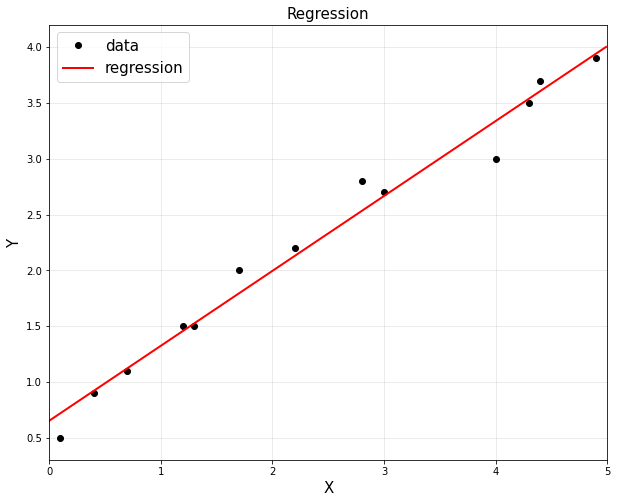

In [8]:
m = y.shape[0]

A = np.hstack([x**0, x])
A = np.asmatrix(A)

theta = (A.T*A).I*A.T*y

print("theta : \n", theta)

plt.figure(figsize=(10, 8))
plt.title("Regression", fontsize=15)
plt.xlabel("X", fontsize=15)
plt.ylabel("Y", fontsize=15)
plt.plot(x, y, "ko", label="data")

xp = np.arange(0, 5, 0.01).reshape(-1, 1)
yp = theta[0, 0] + theta[1, 0] * xp

plt.plot(xp, yp, "r", linewidth=2, label="regression")
plt.legend(fontsize=15)
plt.axis("equal")
plt.grid(alpha=0.3)
plt.xlim([0, 5])
plt.show()

[[0.65245233]
 [0.67148042]]


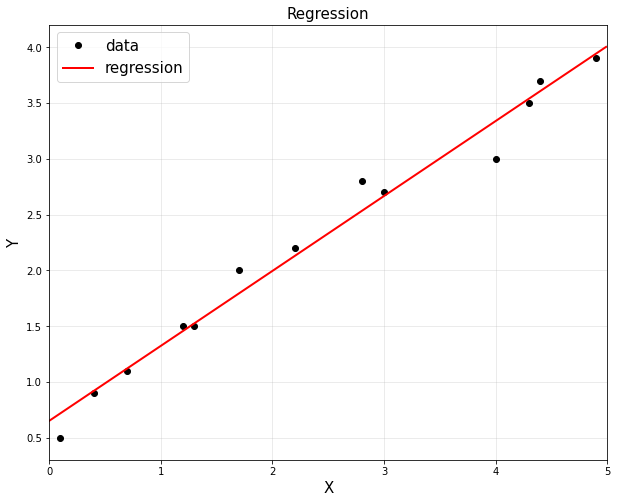

In [12]:
theta = np.random.randn(2, 1)
theta = np.asmatrix(theta)

alpha = 0.001

for _ in range(1000):
    df = 2*(A.T*A*theta - A.T*y)
    theta = theta - alpha*df
    
print(theta)

plt.figure(figsize=(10, 8))
plt.title("Regression", fontsize=15)
plt.xlabel("X", fontsize=15)
plt.ylabel("Y", fontsize=15)
plt.plot(x, y, "ko", label="data")

xp = np.arange(0, 5, 0.01).reshape(-1, 1)
yp = theta[0, 0] + theta[1, 0] * xp

plt.plot(xp, yp, "r", linewidth=2, label="regression")
plt.legend(fontsize=15)
plt.axis("equal")
plt.grid(alpha=0.3)
plt.xlim([0, 5])
plt.show()

/home/piai/anaconda3/envs/iml/lib/python3.7/site-packages/cvxpy/expressions/expression.py:593: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.
This code path has been hit 11 times so far.

  warnings.warn(msg, UserWarning)
/home/piai/anaconda3/envs/iml/lib/python3.7/site-packages/cvxpy/expressions/expression.py:593: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.
This code path has been hit 12 times so far.

  warnings.warn(msg, U

tehta2 : 
 [[1.52632603]
 [0.30291971]]
tehta1 : 
 [[0.72162159]
 [0.64864866]]


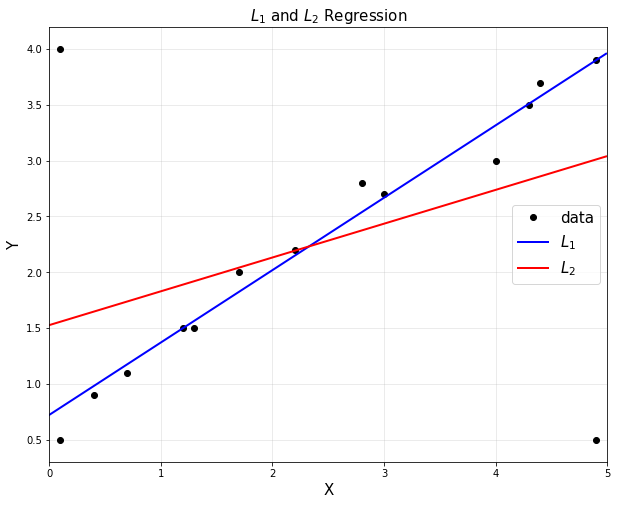

In [20]:
import cvxpy as cvx

x = np.array([0.1, 4.9, 0.1, 0.4, 0.7, 1.2, 1.3, 1.7, 2.2, 2.8, 3.0, 4.0, 4.3, 4.4, 4.9]).reshape(-1, 1)
y = np.array([4.0, 0.5, 0.5, 0.9, 1.1, 1.5, 1.5, 2.0, 2.2, 2.8, 2.7, 3.0, 3.5, 3.7, 3.9]).reshape(-1, 1)

A = np.hstack([x**0, x])
A = np.asmatrix(A)

theta2 = cvx.Variable([2, 1])
obj = cvx.Minimize(cvx.norm(A*theta2-y, 2))
cvx.Problem(obj, []).solve()

print("tehta2 : \n", theta2.value)

theta1 = cvx.Variable([2, 1])
obj = cvx.Minimize(cvx.norm(A*theta1-y, 1))
cvx.Problem(obj, []).solve()

print("tehta1 : \n", theta1.value)


# to plot data in one plot
plt.figure(figsize = (10, 8))
plt.title('$L_1$ and $L_2$ Regression', fontsize = 15)
plt.xlabel('X', fontsize = 15)
plt.ylabel('Y', fontsize = 15)
plt.plot(x, y, 'ko', label = 'data')

# to plot straight lines (fitted lines)
xp = np.arange(0, 5, 0.01).reshape(-1, 1)
yp1 = theta1.value[0,0] + theta1.value[1,0]*xp
yp2 = theta2.value[0,0] + theta2.value[1,0]*xp

plt.plot(xp, yp1, 'b', linewidth=2, label = '$L_1$')
plt.plot(xp, yp2, 'r', linewidth=2, label = '$L_2$')
plt.legend(fontsize = 15)
plt.axis('equal')
plt.xlim([0, 5])
plt.grid(alpha = 0.3)
plt.show()

## Non-linear Regression

theta : 
 [[8.06506357]
 [0.47380065]
 [2.10078664]]


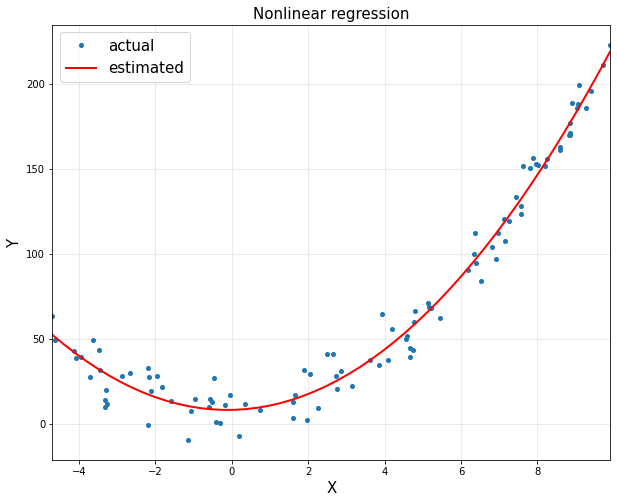

In [24]:
n = 100
x = -5 + 15*np.random.rand(n, 1)
noise = 10*np.random.randn(n, 1)

y = 10 + 1*x + 2*x**2 + noise

A = np.hstack([x**0, x, x**2])
A = np.asmatrix(A)

theta = (A.T*A).I*A.T*y
print("theta : \n", theta)

xp = np.linspace(np.min(x), np.max(x))
yp = theta[0, 0] + theta[1, 0]*xp + theta[2, 0]*xp**2

plt.figure(figsize=(10, 8))
plt.plot(x, y, "o", markersize=4, label="actual")
plt.plot(xp, yp, "r", linewidth=2, label="estimated")

plt.title("Nonlinear regression", fontsize=15)
plt.xlabel("X", fontsize=15)
plt.ylabel("Y", fontsize=15)
plt.xlim([np.min(x), np.max(x)])
plt.grid(alpha=0.3)
plt.legend(fontsize=15)
plt.show()

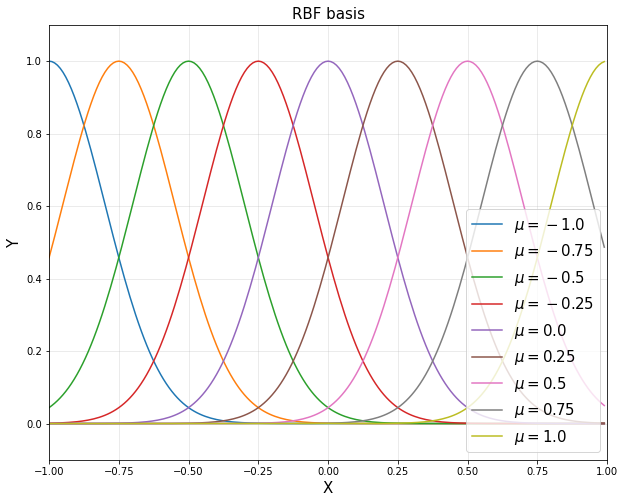

In [26]:
d = 9

u = np.linspace(-1, 1, d)
sigma = 0.2

xp = np.arange(-1, 1, 0.01).reshape(-1, 1) #reshape- 세로로 바뀜
rbfbasis = np.hstack([np.exp(-(xp-u[i])**2/(2*sigma**2)) for i in range(d)])

plt.figure(figsize = (10, 8))

for i in range(d):
    plt.plot(xp, rbfbasis[:,i], label='$\mu = {}$'.format(u[i]))
    
plt.title('RBF basis', fontsize = 15)
plt.xlabel('X', fontsize = 15)
plt.ylabel('Y', fontsize = 15)
plt.axis([-1, 1, -0.1, 1.1])
plt.legend(loc = 'lower right', fontsize = 15)
plt.grid(alpha = 0.3)
plt.show()

In [31]:
n = 10
x = np.linspace(-4.5, 4.5, 10).reshape(-1, 1)
y = np.array([0.9819, 0.7973, 1.9737, 0.1838, 1.3180, -0.8361, -0.6591, -2.4701, -2.8122, -6.2512]).reshape(-1, 1)

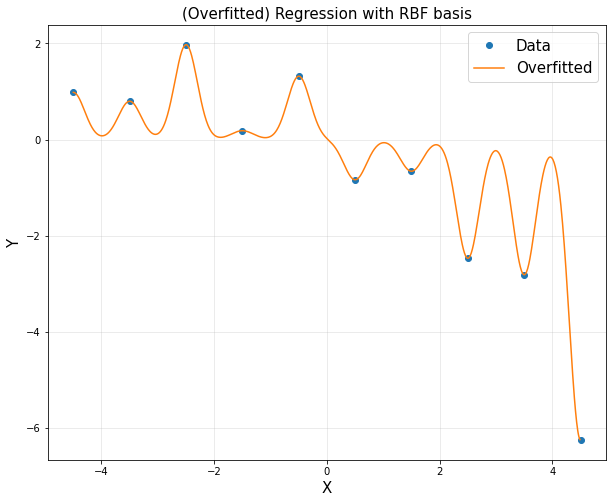

In [32]:
xp = np.arange(-4.5, 4.5, 0.01).reshape(-1, 1)

d = 10
u = np.linspace(-4.5, 4.5, d)
sigma = 0.2

A = np.hstack([np.exp(-(x-u[i])**2/(2*sigma**2)) for i in range(d)])
rbfbasis = np.hstack([np.exp(-(xp-u[i])**2/(2*sigma**2)) for i in range(d)])

A = np.asmatrix(A)
rbfbasis = np.asmatrix(rbfbasis)

theta = (A.T*A).I*A.T*y
yp = rbfbasis*theta

plt.figure(figsize=(10, 8))
plt.plot(x, y, "o", label="Data")
plt.plot(xp, yp, label="Overfitted")
plt.title("(Overfitted) Regression with RBF basis", fontsize=15)
plt.xlabel("X", fontsize=15)
plt.ylabel("Y", fontsize=15)
plt.grid(alpha=0.3)
plt.legend(fontsize=15)
plt.show()

## Regularization

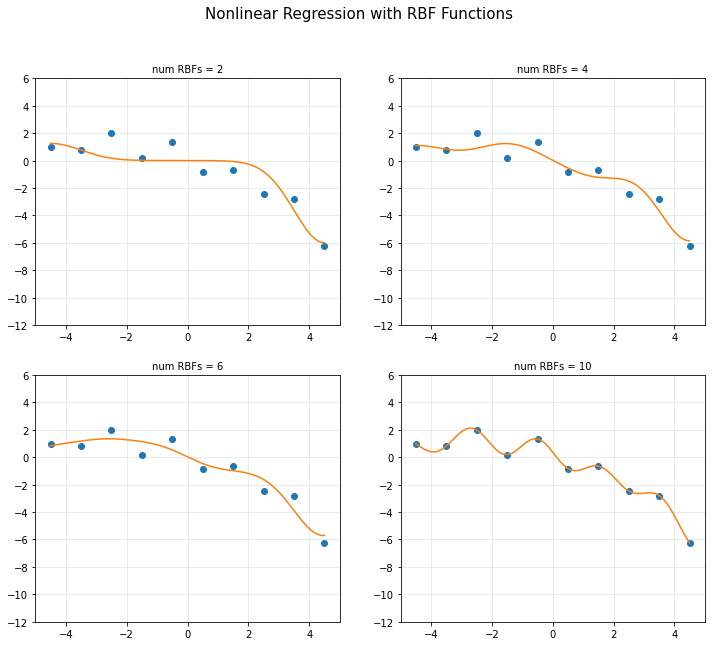

In [35]:
d = [2, 4, 6, 10]
sigma = 1

plt.figure(figsize=(12, 10))

for k in range(4):
    u = np.linspace(-4.5, 4.5, d[k])
    
    A = np.hstack([np.exp(-(x-u[i])**2/(2*sigma**2)) for i in range(d[k])])
    rbfbasis = np.hstack([np.exp(-(xp-u[i])**2/(2*sigma**2)) for i in range(d[k])])
    
    A = np.asmatrix(A)
    rbfbasis = np.asmatrix(rbfbasis)
    
    theta = (A.T*A).I*A.T*y
    yp = rbfbasis*theta
    
    plt.subplot(2, 2, k+1)
    plt.plot(x, y, "o")
    plt.plot(xp, yp)
    plt.axis([-5, 5, -12, 6])
    plt.title("num RBFs = {}".format(d[k]), fontsize=10)
    plt.grid(alpha=0.3)

plt.suptitle("Nonlinear Regression with RBF Functions", fontsize=15)
plt.show()

/home/piai/anaconda3/envs/iml/lib/python3.7/site-packages/cvxpy/expressions/expression.py:593: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.
This code path has been hit 13 times so far.

  warnings.warn(msg, UserWarning)


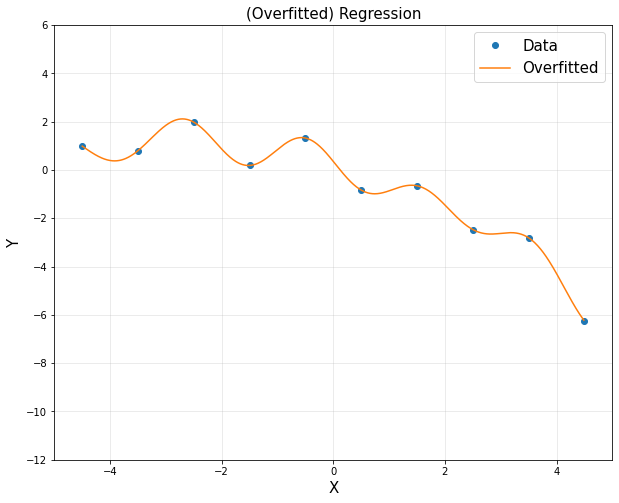

In [37]:
import cvxpy as cvx

d = 10
u = np.linspace(-4.5, 4.5, d)

sigma = 1

A = np.hstack([np.exp(-(x-u[i])**2/(2*sigma**2)) for i in range(d)])
rbfbasis = np.hstack([np.exp(-(xp-u[i])**2/(2*sigma**2)) for i in range(d)])

A = np.asmatrix(A)
rbfbasis = np.asmatrix(rbfbasis)

theta = cvx.Variable([d, 1])
obj = cvx.Minimize(cvx.sum_squares(A*theta-y))
prob = cvx.Problem(obj).solve()

yp = rbfbasis*theta.value

plt.figure(figsize=(10, 8))
plt.plot(x, y, "o", label="Data")
plt.plot(xp, yp, label="Overfitted")
plt.title("(Overfitted) Regression", fontsize=15)
plt.xlabel("X", fontsize=15)
plt.ylabel("Y", fontsize=15)
plt.axis([-5, 5, -12, 6])
plt.legend(fontsize=15)
plt.grid(alpha=0.3)
plt.show()

/home/piai/anaconda3/envs/iml/lib/python3.7/site-packages/cvxpy/expressions/expression.py:593: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.
This code path has been hit 14 times so far.

  warnings.warn(msg, UserWarning)


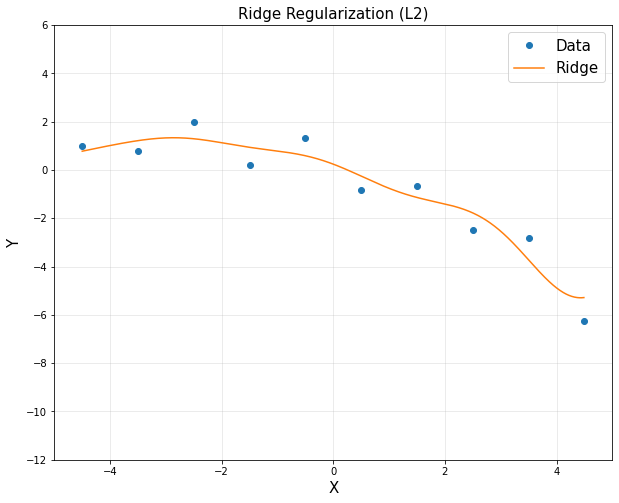

In [38]:
# Ridge regression

import cvxpy as cvx

d = 10
u = np.linspace(-4.5, 4.5, d)

sigma = 1

A = np.hstack([np.exp(-(x-u[i])**2/(2*sigma**2)) for i in range(d)])
rbfbasis = np.hstack([np.exp(-(xp-u[i])**2/(2*sigma**2)) for i in range(d)])

A = np.asmatrix(A)
rbfbasis = np.asmatrix(rbfbasis)

lamb = 0.1
theta = cvx.Variable([d, 1])
obj = cvx.Minimize(cvx.sum_squares(A*theta-y) + lamb*cvx.sum_squares(theta))
prob = cvx.Problem(obj).solve()

yp = rbfbasis*theta.value

plt.figure(figsize=(10, 8))
plt.plot(x, y, "o", label="Data")
plt.plot(xp, yp, label="Ridge")
plt.title("Ridge Regularization (L2)", fontsize=15)
plt.xlabel("X", fontsize=15)
plt.ylabel("Y", fontsize=15)
plt.axis([-5, 5, -12, 6])
plt.legend(fontsize=15)
plt.grid(alpha=0.3)
plt.show()

/home/piai/anaconda3/envs/iml/lib/python3.7/site-packages/cvxpy/expressions/expression.py:593: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.
This code path has been hit 15 times so far.

  warnings.warn(msg, UserWarning)


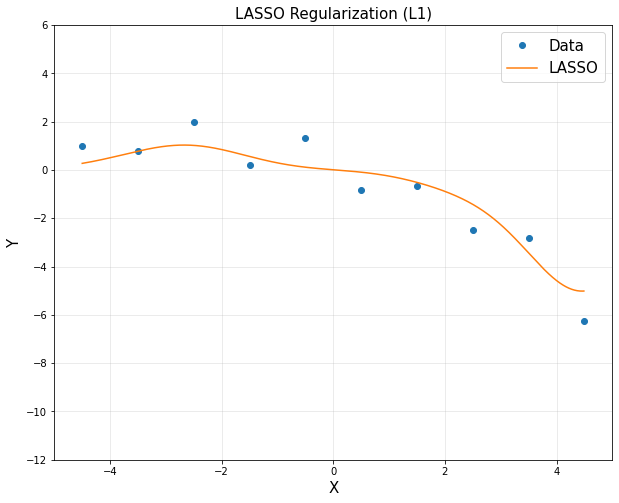

In [39]:
# Lasso regression

lamb = 2
theta = cvx.Variable([d, 1])
obj = cvx.Minimize(cvx.sum_squares(A*theta - y) + lamb*cvx.norm(theta, 1))
prob = cvx.Problem(obj).solve()

yp = rbfbasis*theta.value

plt.figure(figsize = (10, 8))
plt.title('LASSO Regularization (L1)', fontsize = 15)
plt.xlabel('X', fontsize = 15)
plt.ylabel('Y', fontsize = 15)
plt.plot(x, y, 'o', label = 'Data')
plt.plot(xp, yp, label = 'LASSO')
plt.axis([-5, 5, -12, 6])
plt.legend(fontsize = 15)
plt.grid(alpha = 0.3)
plt.show()